SEER BEAST DATASET
*   Veri Anlama ve EDA
*   Öznitelik Mühendisliği ve Seçimi(RFE)
*   Makine Öğrenmesi Algoritmaları ile Modelleme
*   Derin Öğrenme ve Transfer Öğrenme Modelleri
*   Model Karşılaştırması ve Seçimi
*   Modeli Dağıtıma Hazırlama

In [ ]:
#kütüphaneleri tanımlıyorum
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score , KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.svm import SVC
#uyarıları kapatıorum
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#google drive contect kuruyorum
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#datasetimizi yüklüyoruz
data = pd.read_csv("/content/drive/MyDrive/SEER Breast Cancer Dataset .csv")
data

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,52,White,Married (including common law),NaN,T1,N1,IIA,Well differentiated; Grade I,Regional,10,Positive,Positive,19,1,107,Alive
4020,53,White,Married (including common law),NaN,T1,N2,IIIA,Poorly differentiated; Grade III,Regional,9,Negative,Negative,13,5,107,Alive
4021,53,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Negative,Negative,4,2,107,Alive
4022,60,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Positive,Positive,14,2,107,Alive


In [ ]:
data.columns

Index(['Age', 'Race ', 'Marital Status', 'Unnamed: 3', 'T Stage ', 'N Stage',
       '6th Stage', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Unnamed: 3              0 non-null      float64
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

In [ ]:
#Null olan colonu siliyorum
data.drop(['Unnamed: 3'],axis=1,inplace=True)

In [ ]:
data.isnull().sum()

,0
Age,0
Race,0
Marital Status,0
T Stage,0
N Stage,0
6th Stage,0
Grade,0
A Stage,0
Tumor Size,0
Estrogen Status,0


Datamda başka null olan değer yok




---
Datadaki sayısal değerlerin istatistiklerini hesaplıyoruz


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4024.0,53.972167,8.963134,30.0,47.0,54.0,61.0,69.0
Tumor Size,4024.0,30.473658,21.119696,1.0,16.0,25.0,38.0,140.0
Regional Node Examined,4024.0,14.357107,8.099675,1.0,9.0,14.0,19.0,61.0
Reginol Node Positive,4024.0,4.158052,5.109331,1.0,1.0,2.0,5.0,46.0
Survival Months,4024.0,71.297962,22.921430,1.0,56.0,73.0,90.0,107.0




---


Datadaki kategorik değerlerin istatistiğini hesaplıyoruz

In [ ]:
data.describe(include=['O'])

,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Estrogen Status,Progesterone Status,Status
count,4024,4024,4024,4024,4024,4024,4024,4024,4024,4024
unique,3,5,4,3,5,4,2,2,2,2
top,White,Married (including common law),T2,N1,IIA,Moderately differentiated; Grade II,Regional,Positive,Positive,Alive
freq,3413,2643,1786,2732,1305,2351,3932,3755,3326,3408


Datasetimdeki kolonları kategorik ve sayısal olarak ikiye ayırdım.

In [ ]:
kategorik_cols = data.select_dtypes(include=['object']).columns
kategorik_data = data[kategorik_cols]

sayisal_cols = data.select_dtypes(include=['int64', 'float64']).columns
sayisal_data = data[sayisal_cols]

Kategorik değerlerin dağılımını incelemek için grafik oluşturyorum

Counts for Race :
Race 
White                                                        3413
Other (American Indian/AK Native, Asian/Pacific Islander)     320
Black                                                         291
Name: count, dtype: int64


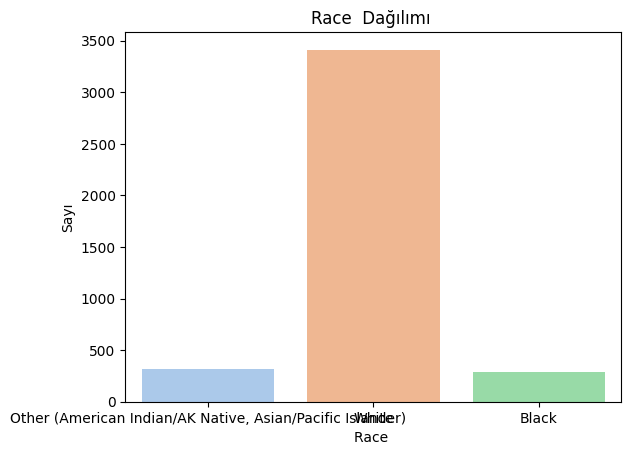

Counts for Marital Status:
Marital Status
Married (including common law)    2643
Single (never married)             615
Divorced                           486
Widowed                            235
Separated                           45
Name: count, dtype: int64


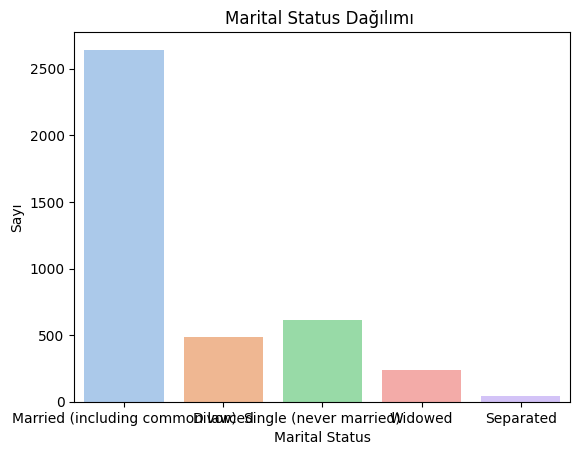

Counts for T Stage :
T Stage 
T2    1786
T1    1603
T3     533
T4     102
Name: count, dtype: int64


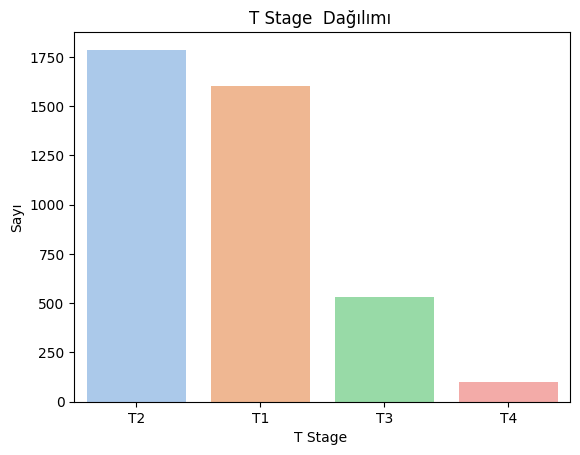

Counts for N Stage:
N Stage
N1    2732
N2     820
N3     472
Name: count, dtype: int64


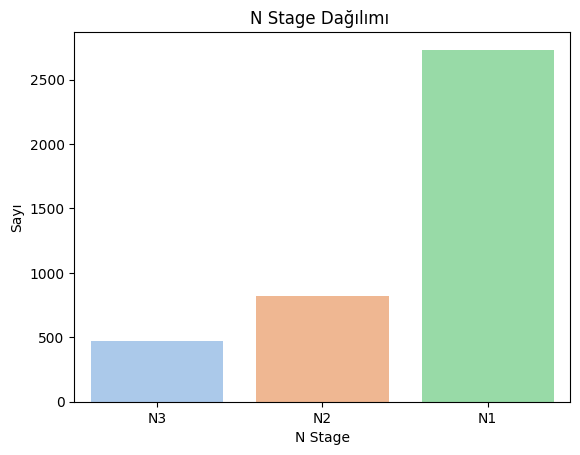

Counts for 6th Stage:
6th Stage
IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: count, dtype: int64


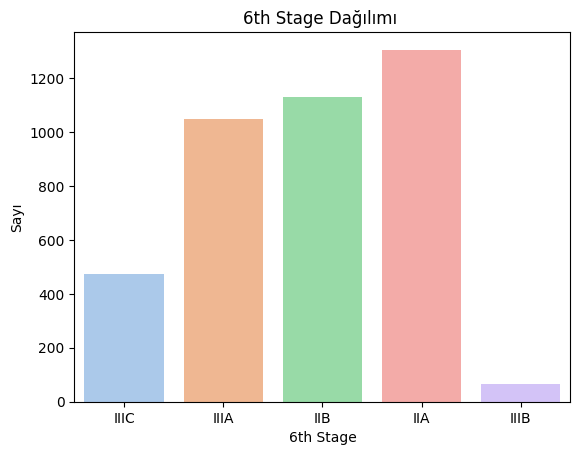

Counts for Grade:
Grade
Moderately differentiated; Grade II       2351
Poorly differentiated; Grade III          1111
Well differentiated; Grade I               543
Undifferentiated; anaplastic; Grade IV      19
Name: count, dtype: int64


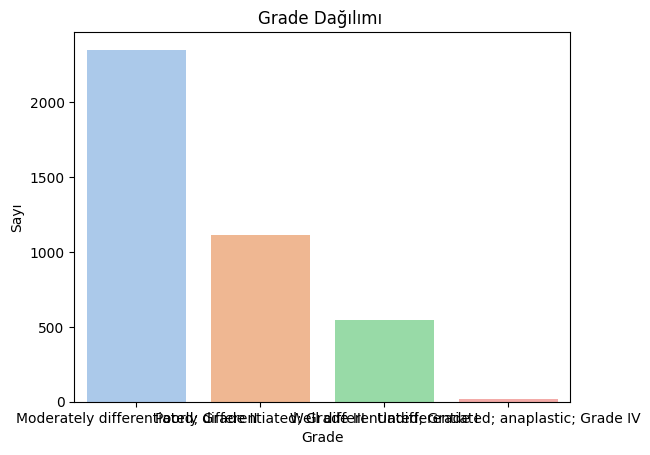

Counts for A Stage:
A Stage
Regional    3932
Distant       92
Name: count, dtype: int64


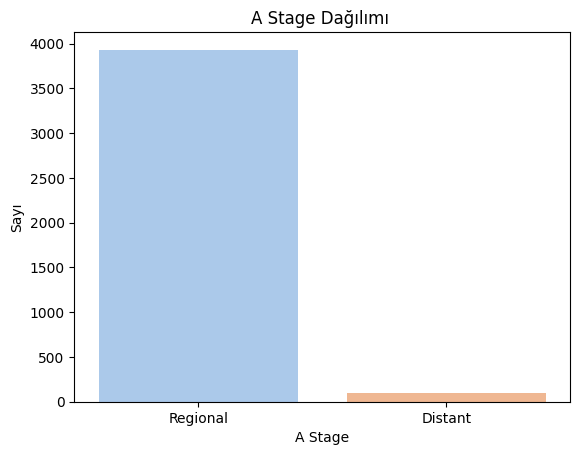

Counts for Estrogen Status:
Estrogen Status
Positive    3755
Negative     269
Name: count, dtype: int64


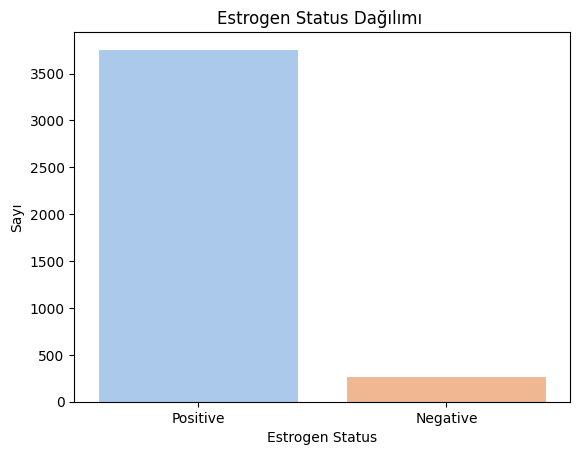

Counts for Progesterone Status:
Progesterone Status
Positive    3326
Negative     698
Name: count, dtype: int64


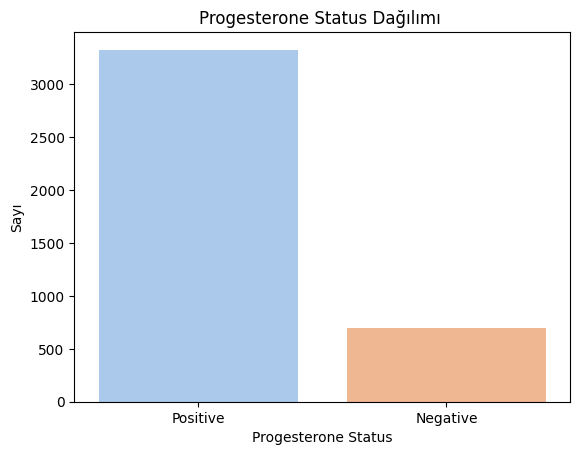

Counts for Status:
Status
Alive    3408
Dead      616
Name: count, dtype: int64


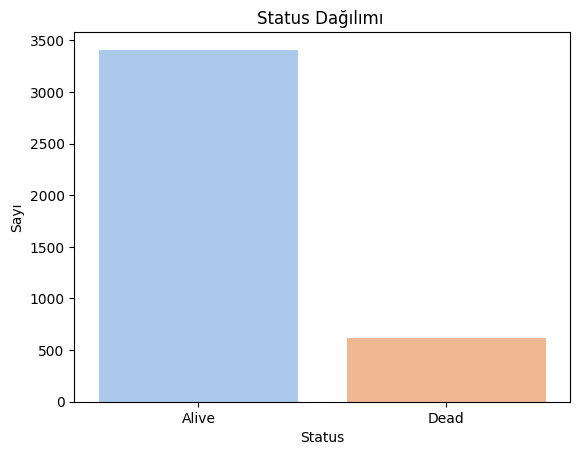

In [ ]:
for col in kategorik_cols:

    print(f"Counts for {col}:")
    print(data[col].value_counts())

    sns.countplot(x=data[col], palette='pastel')
    plt.title(f"{col} Dağılımı ")  # Başlık
    plt.xlabel(col)
    plt.ylabel('Sayı')
    plt.show()  # Grafiği gösterme

Kategorik veriyi incelersek meme kanserinde beyaz ırkın evlilerin ve hormonal olarak pozitif olmasının hasta olduğunu yorumlayabilriz.



---


Sayısal değerlerinde dağılımını incelemek için farklı bi grafik oluşturuyorum.





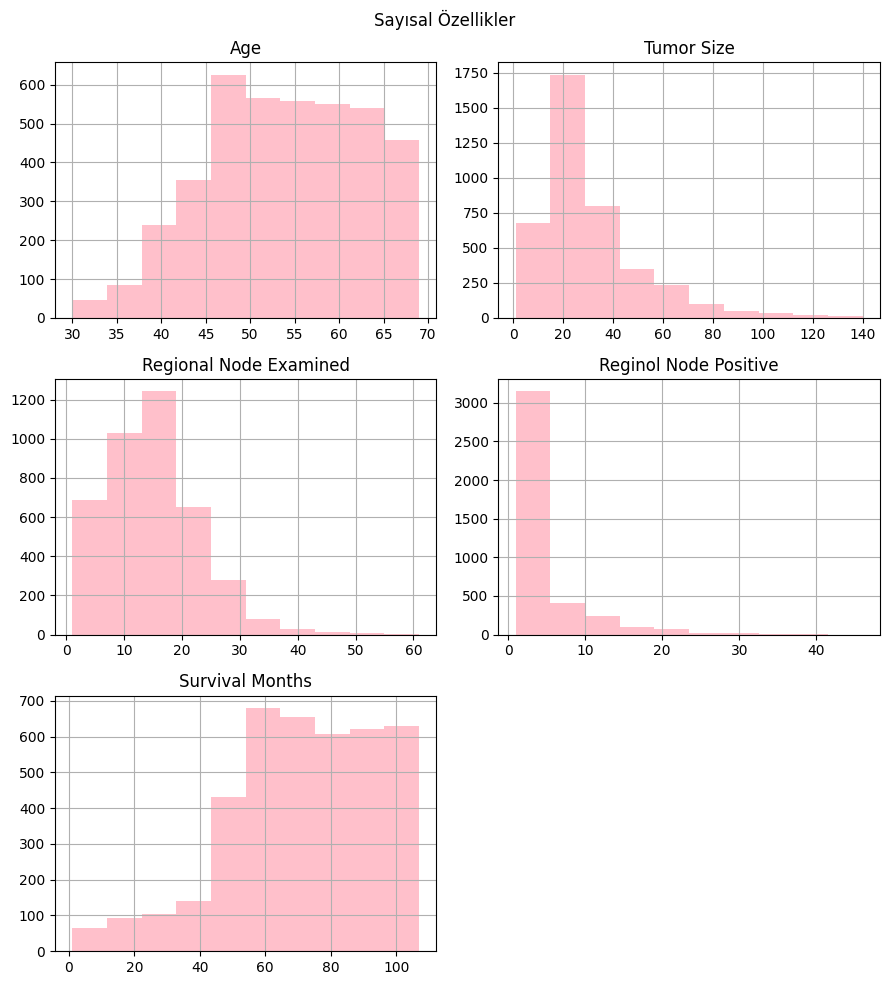

In [ ]:
data[sayisal_cols].hist(figsize=(9, 10),color='pink')
plt.suptitle('Sayısal Özellikler')
plt.tight_layout()
plt.show()



---

Sayısal değerlerin korelasyon matrisine bakıyorum

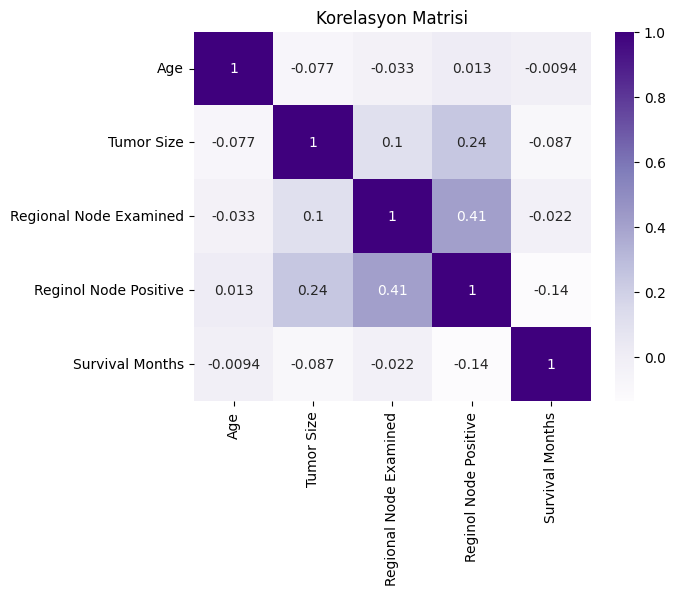

In [ ]:
korelasyon_matrisi = data[sayisal_cols].corr()
sns.heatmap(korelasyon_matrisi, annot=True, cmap='Purples')
plt.title('Korelasyon Matrisi')
plt.show()

Aykırı verileri görselleştiriyorum.

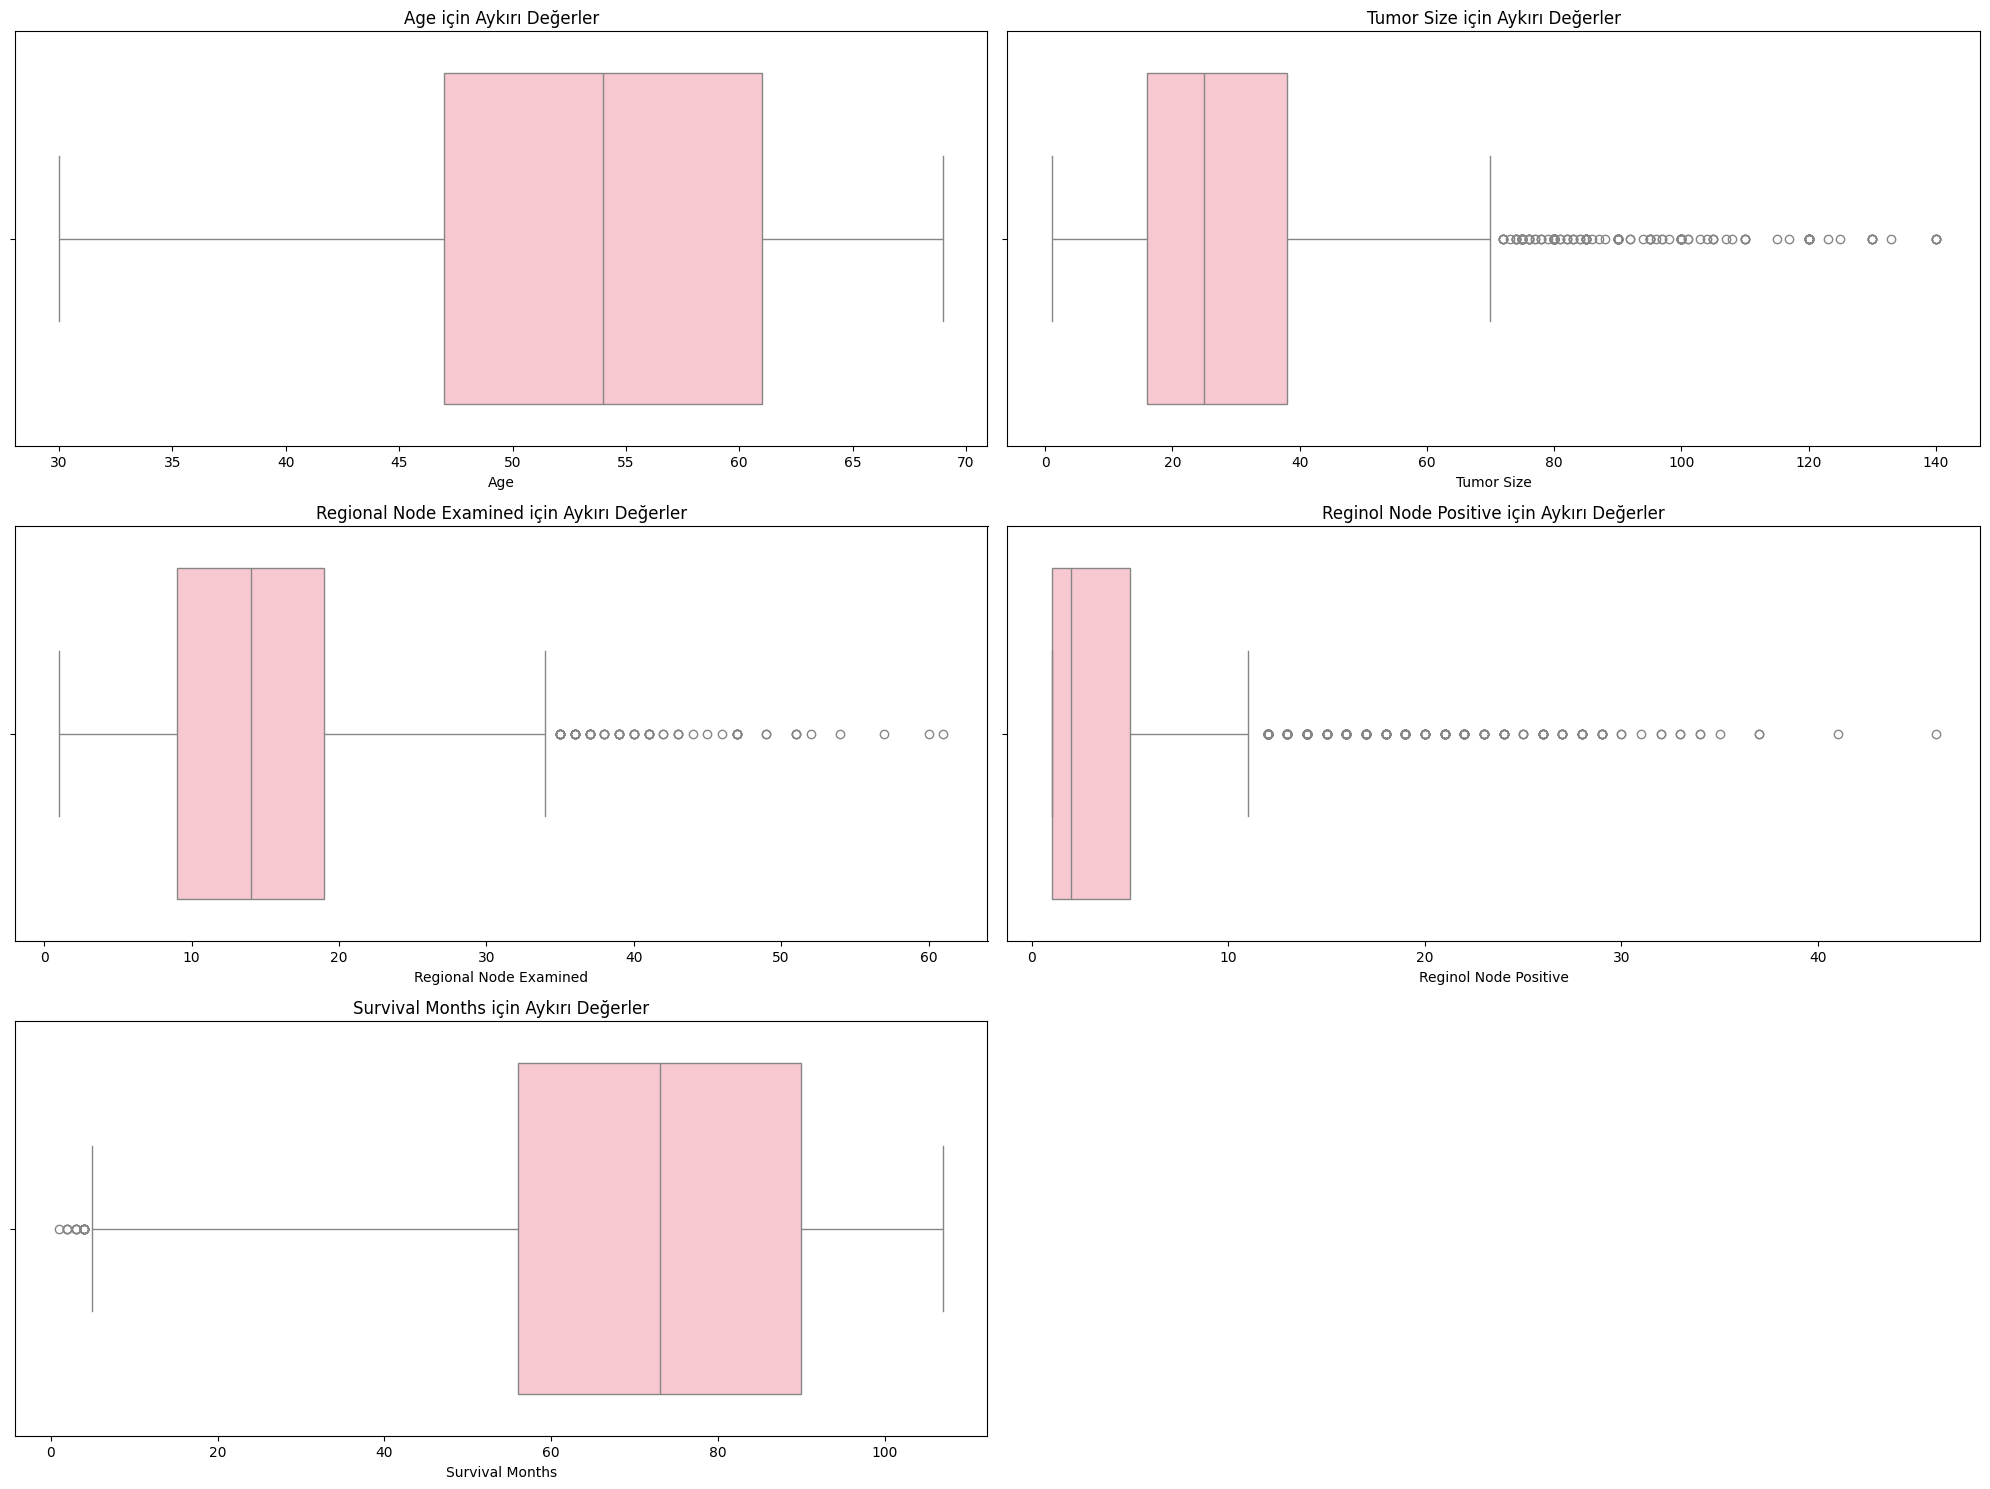

In [ ]:
cols = 2  # Her satırda 2 grafik
rows = len(sayisal_cols) // cols + (len(sayisal_cols) % cols > 0)  # Gerekli satır sayısı
plt.figure(figsize=(20, rows * 5))
# Her sütun için subplot oluşturuyorum for döngüsü oluşturdum
for i, col in enumerate(sayisal_cols, 1):
    plt.subplot(rows, cols, i)  # Satır ve sütun düzenine göre subplot
    sns.boxplot(data=data, x=col , color='pink')  # Boxplot çizimi
    plt.title(f"{col} için Aykırı Değerler")
    plt.tight_layout()
plt.show()




---


Aykırı veriler için IQR yöntemi kullanıyorum ve aykırı verileri birleştirip datadan kaldırıp yeni data oluşturuyorum.

In [ ]:
import pandas as pd

# Sayısal veri sütunlarını seçmek için
sayisal_data = data.select_dtypes(include=['float64', 'int64']).columns

def detect_outliers_iqr(data):
    outlier_indices = []
    outliers_data = pd.DataFrame()

    for column in sayisal_data:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Aykırı değerlerin olduğu satırları filtreleme yapıoruz
        outliers_in_col = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

        # Aykırı değerlerin indekslerini listeye ekledik
        outlier_indices.extend(outliers_in_col.index)

        # Aykırı değerleri toplayarak birleştirdim
        outliers_data = pd.concat([outliers_data, outliers_in_col], axis=0)

    # Aykırı verilerin indekslerini benzersiz hale getiriyorm
    outlier_indices = list(set(outlier_indices))
    # Aykırı verilerin tekrarlarını kaldırıyorum
    outliers_data = outliers_data.drop_duplicates()

    return outliers_data, outlier_indices

# Fonksiyonu çağırdım
outliers_data, outlier_indices = detect_outliers_iqr(data)

# Aykırı değerleri çıkarma işlemi yapıorum ve oluşacak dataya yeni_data dedim
Yeni_data = data.drop(outlier_indices)
print(Yeni_data)


      Age                                              Race   \
18     64                                              White   
19     31                                              White   
20     31                                              Black   
21     41                                              Black   
22     57                                              White   
...   ...                                                ...   
4019   52                                              White   
4020   53                                              White   
4021   53                                              White   
4022   60  Other (American Indian/AK Native, Asian/Pacifi...   
4023   62                                              White   

                      Marital Status T Stage  N Stage 6th Stage  \
18    Married (including common law)       T3      N1      IIIA   
19                          Divorced       T2      N1       IIB   
20            Single (never ma

In [ ]:
Yeni_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3444 entries, 18 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     3444 non-null   int64 
 1   Race                    3444 non-null   object
 2   Marital Status          3444 non-null   object
 3   T Stage                 3444 non-null   object
 4   N Stage                 3444 non-null   object
 5   6th Stage               3444 non-null   object
 6   Grade                   3444 non-null   object
 7   A Stage                 3444 non-null   object
 8   Tumor Size              3444 non-null   int64 
 9   Estrogen Status         3444 non-null   object
 10  Progesterone Status     3444 non-null   object
 11  Regional Node Examined  3444 non-null   int64 
 12  Reginol Node Positive   3444 non-null   int64 
 13  Survival Months         3444 non-null   int64 
 14  Status                  3444 non-null   object
dtypes: int64

Yeni datamızdaki aykırı verileri gözlemlemek için görselleştiriyoruz.

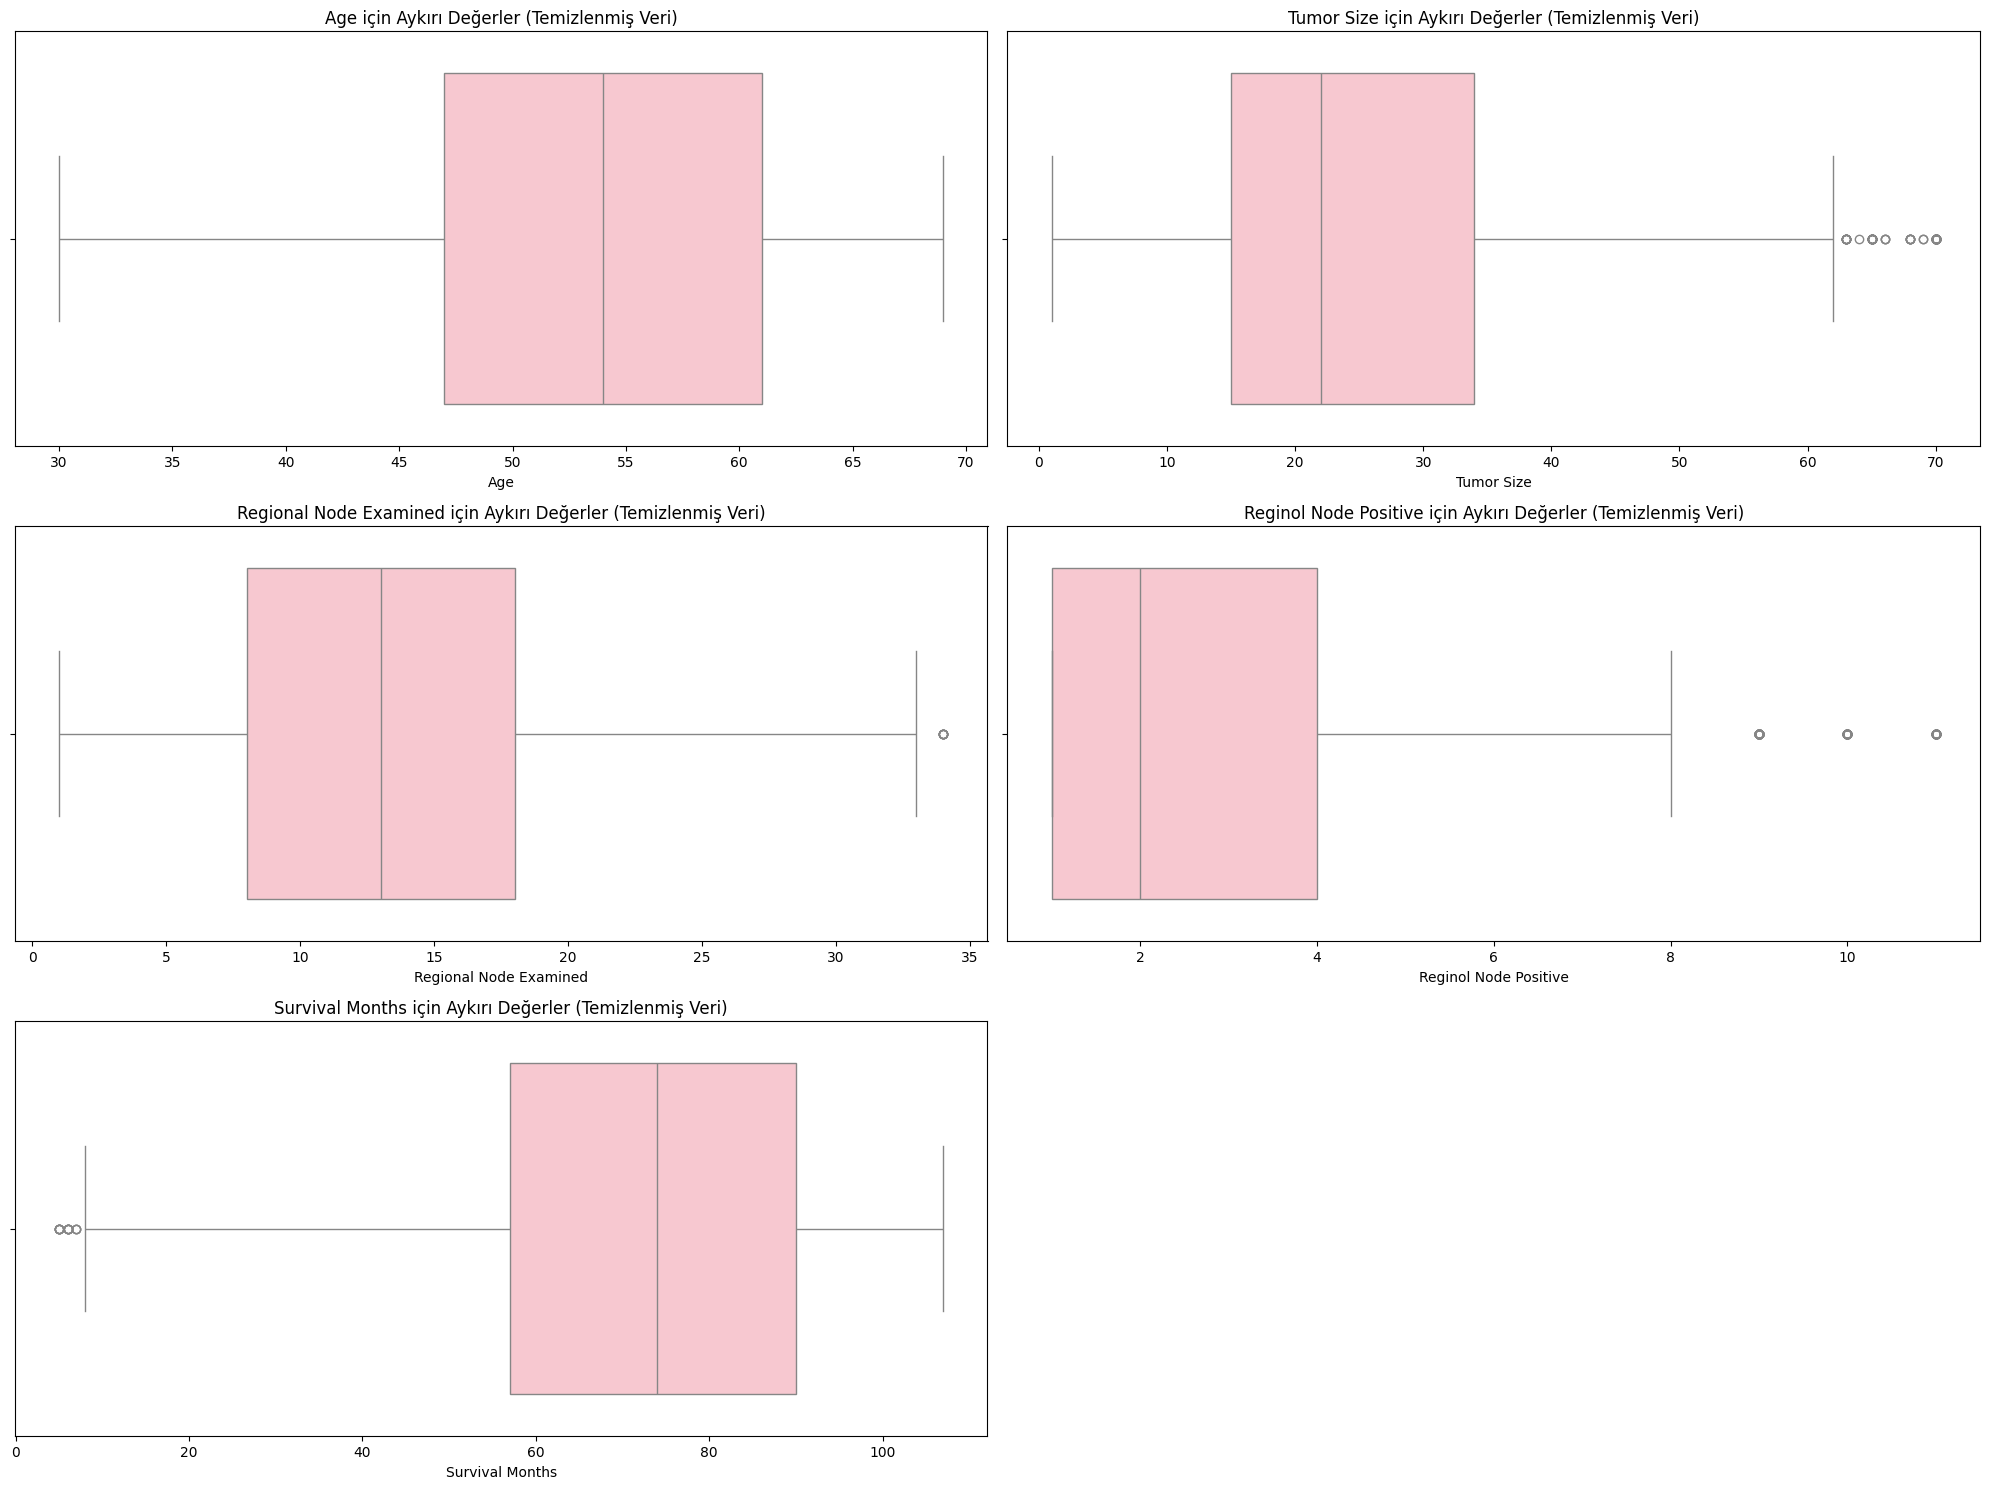

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


cols = 2  # Her satırda 2 grafik
rows = len(sayisal_cols) // cols + (len(sayisal_cols) % cols > 0)  # Gerekli satır sayısı

# Temizlenmiş veri üzerinde bir figür oluşturuyoruz
plt.figure(figsize=(20, rows * 5))

# Her sütun için subplot oluşturuyoruz
for i, col in enumerate(sayisal_cols, 1):
    plt.subplot(rows, cols, i)  # Satır ve sütun düzenine göre subplot
    sns.boxplot(data=Yeni_data, x=col, color='pink')
    plt.title(f"{col} için Aykırı Değerler (Temizlenmiş Veri)")
    plt.tight_layout()  # Alt başlıkları sıkıştırarak düzenli yapıyoruz

# Görselleştirmeyi gösteriyoruz
plt.show()


In [ ]:
#yeni_data diye isimlendirmiştim bunun ismini kolay olsun diye df yapıorm
df = Yeni_data.copy()


Model eğitebilmek için datama Label Encoding işlemi ile kategorik veriyi numeric veri haline çeviriyorum.

In [ ]:
df.columns = df.columns.str.strip() #string de hata alıyorum bu olmayınca
#Hedef kolon olarak yaşam durumunu (states) seçtim
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Diğer kategorik sütunları encode edelim
df['Status'] = label_encoder.fit_transform(df['Status'])
categorical_columns = ['Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
                       'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status']

# Kategorik sütunları encode ediyorum
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
print(df.head())

    Age  Race  Marital Status  T Stage  N Stage  6th Stage  Grade  A Stage  \
18   64     2               1        2        0          2      0        1   
19   31     2               0        1        0          1      0        1   
20   31     0               3        1        1          2      1        1   
21   41     0               3        0        0          0      0        1   
22   57     2               1        0        0          0      0        1   

    Tumor Size  Estrogen Status  Progesterone Status  Regional Node Examined  \
18          51                1                    1                      16   
19          42                1                    1                       9   
20          30                0                    0                      13   
21          20                0                    0                       2   
22          13                1                    1                      11   

    Reginol Node Positive  Survival Months  Status

Yeni data için istatistik değerlerine bakıyoruz.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3444.0,54.004936,8.913906,30.0,47.0,54.0,61.0,69.0
Race,3444.0,1.775261,0.564733,0.0,2.0,2.0,2.0,2.0
Marital Status,3444.0,1.375436,1.055745,0.0,1.0,1.0,1.0,4.0
T Stage,3444.0,0.673345,0.689642,0.0,0.0,1.0,1.0,3.0
N Stage,3444.0,0.279036,0.518842,0.0,0.0,0.0,0.0,2.0
6th Stage,3444.0,1.010453,0.993388,0.0,0.0,1.0,2.0,4.0
Grade,3444.0,0.690476,1.035536,0.0,0.0,0.0,1.0,3.0
A Stage,3444.0,0.989547,0.101719,0.0,1.0,1.0,1.0,1.0
Tumor Size,3444.0,26.248258,14.703189,1.0,15.0,22.0,34.0,70.0
Estrogen Status,3444.0,0.944251,0.229470,0.0,1.0,1.0,1.0,1.0


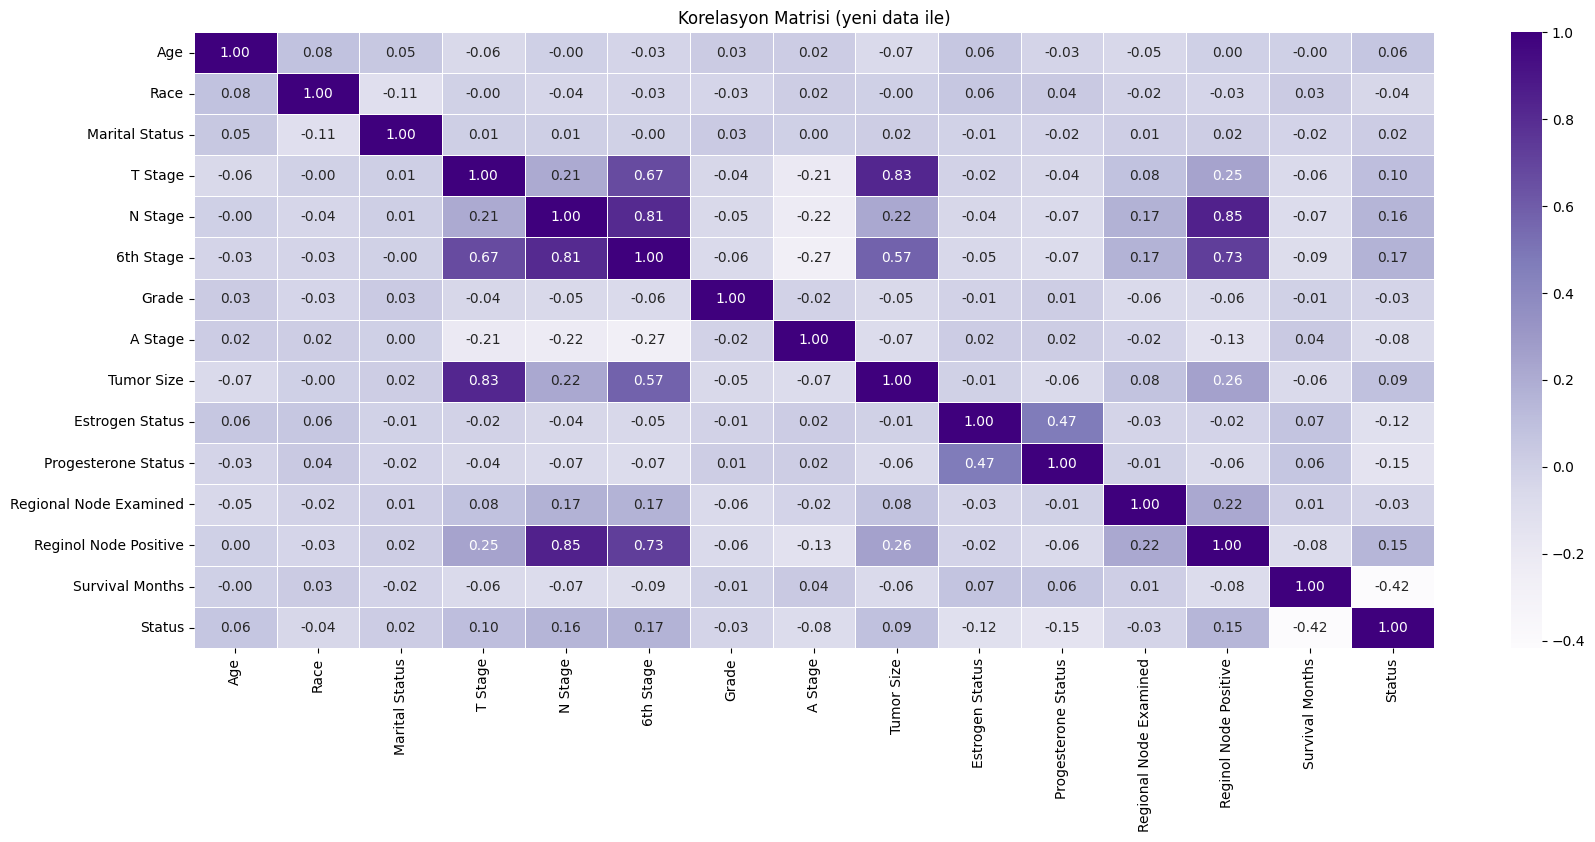

In [ ]:

plt.figure(figsize=(20, 8))
korelasyon_matrisi = df.corr()
sns.heatmap(korelasyon_matrisi, annot=True, cmap='Purples', fmt='.2f', linewidths=0.5)
plt.title('Korelasyon Matrisi (yeni data ile)')

plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3444 entries, 18 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     3444 non-null   int64
 1   Race                    3444 non-null   int64
 2   Marital Status          3444 non-null   int64
 3   T Stage                 3444 non-null   int64
 4   N Stage                 3444 non-null   int64
 5   6th Stage               3444 non-null   int64
 6   Grade                   3444 non-null   int64
 7   A Stage                 3444 non-null   int64
 8   Tumor Size              3444 non-null   int64
 9   Estrogen Status         3444 non-null   int64
 10  Progesterone Status     3444 non-null   int64
 11  Regional Node Examined  3444 non-null   int64
 12  Reginol Node Positive   3444 non-null   int64
 13  Survival Months         3444 non-null   int64
 14  Status                  3444 non-null   int64
dtypes: int64(15)
memory usage

In [ ]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
18,64,2,1,2,0,2,0,1,51,1,1,16,1,5,1
19,31,2,0,1,0,1,0,1,42,1,1,9,3,5,0
20,31,0,3,1,1,2,1,1,30,0,0,13,4,5,1
21,41,0,3,0,0,0,0,1,20,0,0,2,2,5,1
22,57,2,1,0,0,0,0,1,13,1,1,11,1,5,1


In [ ]:
# Bu benim aykırı verileri temizlemeden ve kategorik verileri dönüştürmeden önceki datam
print(data.iloc[18])

Age                                                        64
Race                                                    White
Marital Status                 Married (including common law)
T Stage                                                    T3
N Stage                                                    N1
6th Stage                                                IIIA
Grade                     Moderately differentiated; Grade II
A Stage                                              Regional
Tumor Size                                                 51
Estrogen Status                                      Positive
Progesterone Status                                  Positive
Regional Node Examined                                     16
Reginol Node Positive                                       1
Survival Months                                             5
Status                                                   Dead
Name: 18, dtype: object


In [ ]:
# Bu benim aykırı verileri temizleyip ve kategorik verileri dönüştürdüğüm data
print(df.iloc[0])


Age                       64
Race                       2
Marital Status             1
T Stage                    2
N Stage                    0
6th Stage                  2
Grade                      0
A Stage                    1
Tumor Size                51
Estrogen Status            1
Progesterone Status        1
Regional Node Examined    16
Reginol Node Positive      1
Survival Months            5
Status                     1
Name: 18, dtype: int64


model eğitirken model performansını arttırmak adın RFE (Recursive Feature Elimination) öznitelik seçimi kullanacağım

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier


X = df.drop(columns=['Status'],axis=1)  # 'Status' hedef değişken olarak varsayılmıştır.
y = df['Status']

rfe= RFE(estimator=DecisionTreeClassifier(),n_features_to_select=10)
rfe.fit(X,y)

for i, col in zip(range(X.shape[1]), X.columns):
    if rfe.ranking_[i] == 1:  # Eğer rank 1 ise seçilen özniteliklerimizi yazdıracak
        print(f"{col} selected={rfe.support_[i]} ")

Age selected=True 
Marital Status selected=True 
T Stage selected=True 
6th Stage selected=True 
Grade selected=True 
Tumor Size selected=True 
Progesterone Status selected=True 
Regional Node Examined selected=True 
Reginol Node Positive selected=True 
Survival Months selected=True 




---


Aşağıda 5 farklı Temel Öğrenme Modeli kullandım:

*   Logistic Regression
*   Random Forest Classifier
*   SVC
*   Gradient Boosting Classifier
*   Extra Trees Classifier


  Ve bu modeller için ROC eğrisi ve CM tablosu oluşturup tüm metriklere göre yazdırdım .





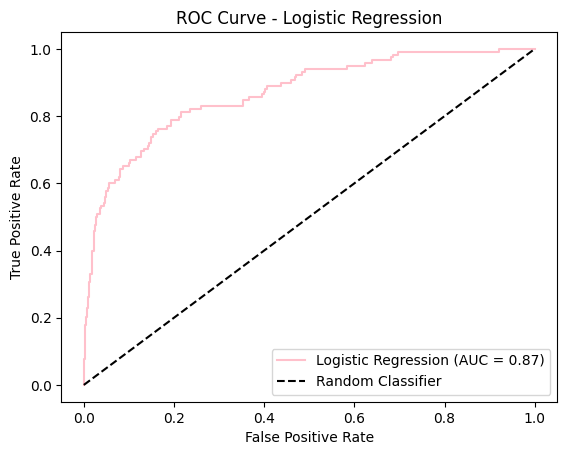

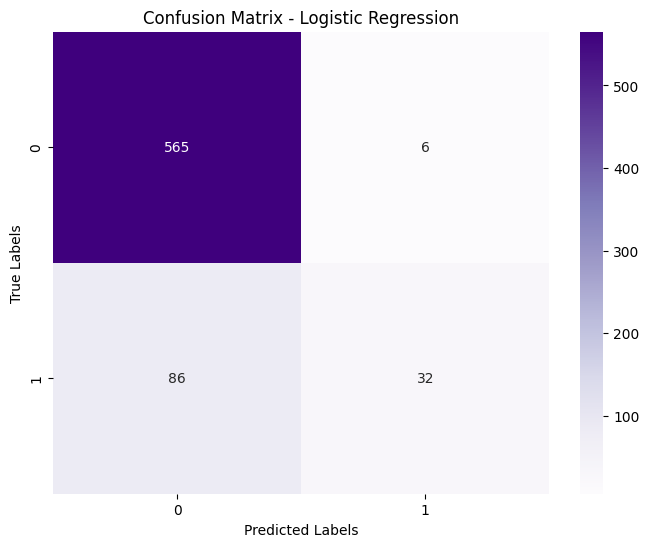

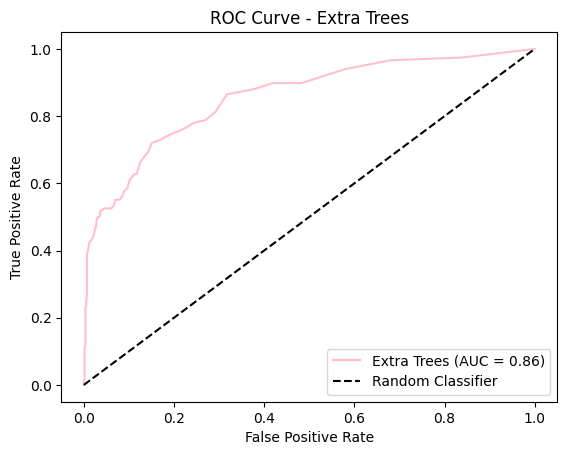

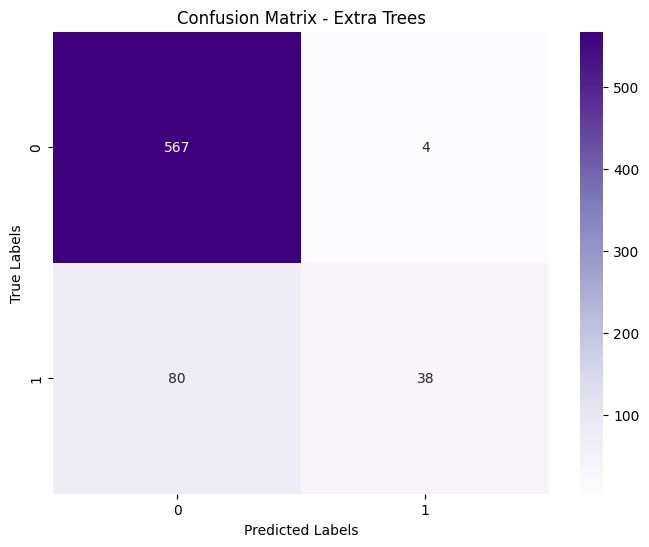

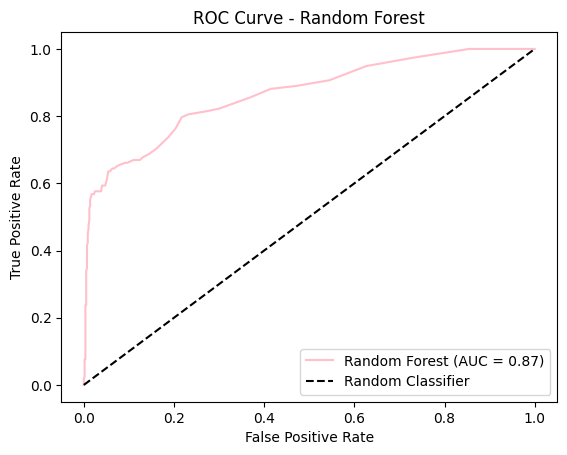

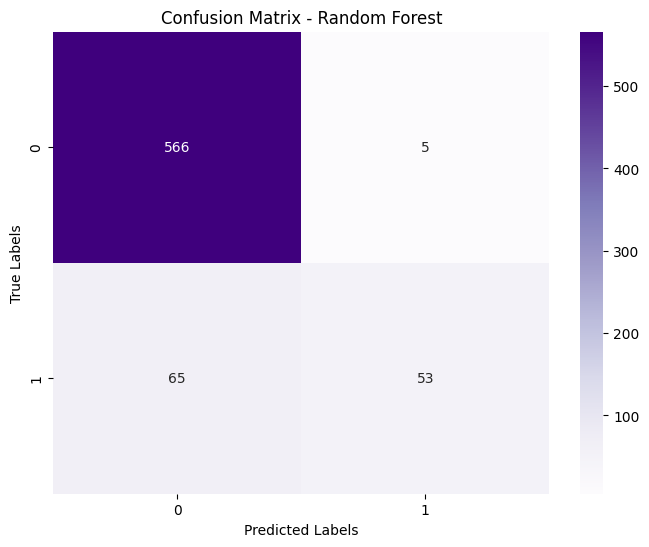

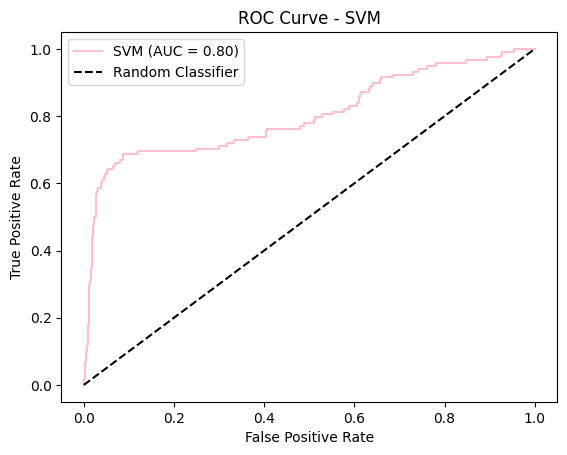

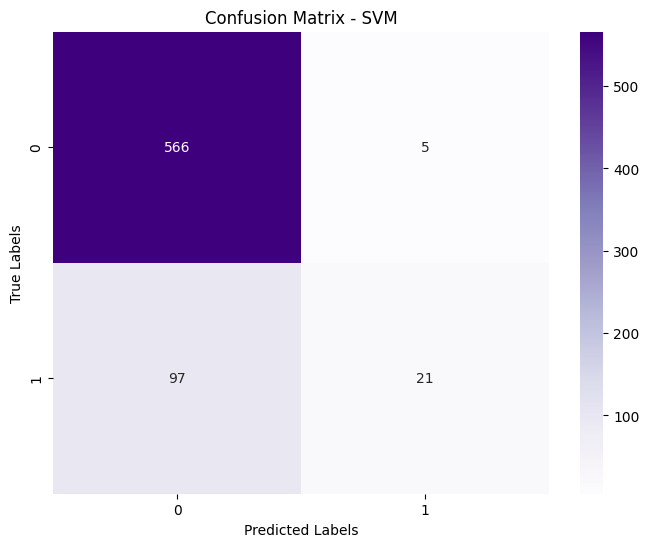

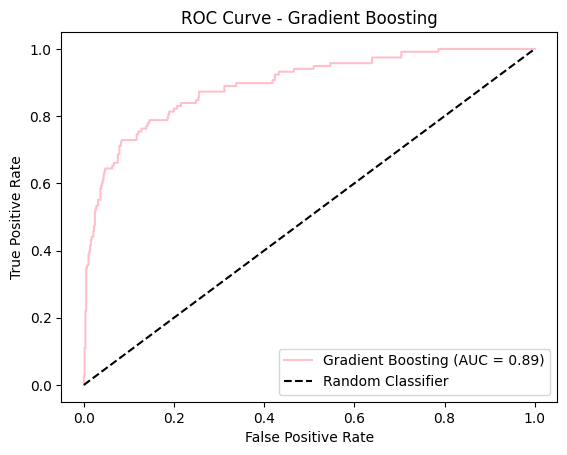

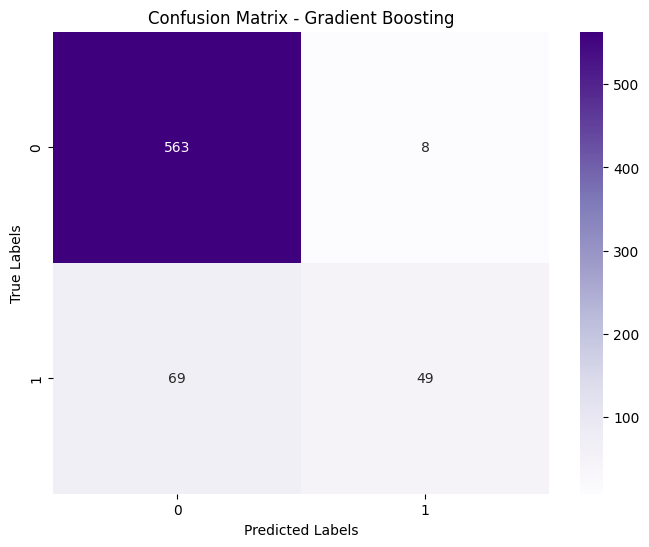

Logistic Regression Metrics:
accuracy: 0.8664731494920174
f1: 0.41025641025641024
precision: 0.8421052631578947
recall: 0.2711864406779661
kappa: 0.35657152137723824
roc_auc: 0.8691709460061148

Extra Trees Metrics:
accuracy: 0.8780841799709724
f1: 0.475
precision: 0.9047619047619048
recall: 0.3220338983050847
kappa: 0.42313212662467115
roc_auc: 0.8561548279853959

Random Forest Metrics:
accuracy: 0.8984034833091437
f1: 0.6022727272727273
precision: 0.9137931034482759
recall: 0.4491525423728814
kappa: 0.5516657990629881
roc_auc: 0.8655495859182523

SVM Metrics:
accuracy: 0.8519593613933236
f1: 0.2916666666666667
precision: 0.8076923076923077
recall: 0.17796610169491525
kappa: 0.24497206703910612
roc_auc: 0.8022203092997715

Gradient Boosting Metrics:
accuracy: 0.888243831640058
f1: 0.56
precision: 0.8596491228070176
recall: 0.4152542372881356
kappa: 0.5047468797550478
roc_auc: 0.8934296061028822



In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score, roc_curve, auc
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Özellikler ve hedef değişken
X = df.drop('Status', axis=1)  # Hedef değişken 'Status' olduğu için onu çıkarıyoruz
y = df['Status']  # 'Status' hedef değişken olarak seçtim

secilen_ozellikler = X.columns[rfe.support_]#rfe ile elde ettiğimiz kolonlar

X_selected = X[secilen_ozellikler]
# Eğitim ve test verilerini ayırıyoruz
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


models = {
    "Logistic Regression": LogisticRegression(),
    "Extra Trees": ExtraTreesClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Gradient Boosting": GradientBoostingClassifier()
}

dogruluk = {}

for model_name, model in models.items():

    model.fit(X_train, y_train)#modeli eğittik

    y_pred = model.predict(X_test) #modelin tahminleri
    y_prob = model.predict_proba(X_test)[:, 1] #sınıf 1 için modelin olasılık tahmini

    #metrikleri hesaplıyorum
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)

    #roc eğrisini çizmek için
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    #metrikleri dogruluk listemize ekledik
    dogruluk[model_name]={'accuracy':accuracy,'f1':f1,'precision':precision,'recall':recall,'kappa':kappa,'roc_auc':roc_auc}

    plt.figure()
    plt.plot(fpr, tpr, color='pink',label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()

    # Confusion Matrix çizimi
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


for model_name, metrics in dogruluk.items():
    print(f"{model_name} Metrics:")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value}")
    print()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Veri setini alıyoruz (df, veri çerçevesi)
X = df.drop(columns=['Status'], axis=1)  # Özellikler
y = df['Status']  # Hedef değişken

# Özellikleri ölçeklendiriyoruz
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


ANN DEEP LEARNİNG

In [ ]:
# ANN modelini oluşturuyoruz
model = Sequential()

# Giriş katmanı ve ilk gizli katman
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))  # Dropout ile aşırı öğrenmeyi engellemeye çalışıyoruz

# İkinci gizli katman
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# Çıktı katmanı
model.add(Dense(1, activation='sigmoid'))  # İkili sınıflandırma olduğu için sigmoid kullanıyoruz

# Modeli derliyoruz
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Erken durdurma ile aşırı öğrenmeyi engelliyoruz
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Modeli eğitiyoruz
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7807 - loss: 0.4823 - val_accuracy: 0.8491 - val_loss: 0.3453
Epoch 2/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8950 - loss: 0.2917 - val_accuracy: 0.8476 - val_loss: 0.3572
Epoch 3/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9102 - loss: 0.2578 - val_accuracy: 0.8592 - val_loss: 0.3290
Epoch 4/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9179 - loss: 0.2434 - val_accuracy: 0.8607 - val_loss: 0.3233
Epoch 5/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9137 - loss: 0.2566 - val_accuracy: 0.8636 - val_loss: 0.3262
Epoch 6/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9093 - loss: 0.2660 - val_accuracy: 0.8665 - val_loss: 0.3258
Epoch 7/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9222 - loss: 0.2519 - val_accuracy: 0.8679 - val_loss: 0.3182
Epoch 8/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9154 - loss: 0.2551 - val_accuracy: 0.8650 - v




---


ANN modeli için Loss ve Accuracy ve Confusion matrix grafikleri

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8877 - loss: 0.3049
Test Accuracy: 88.39%


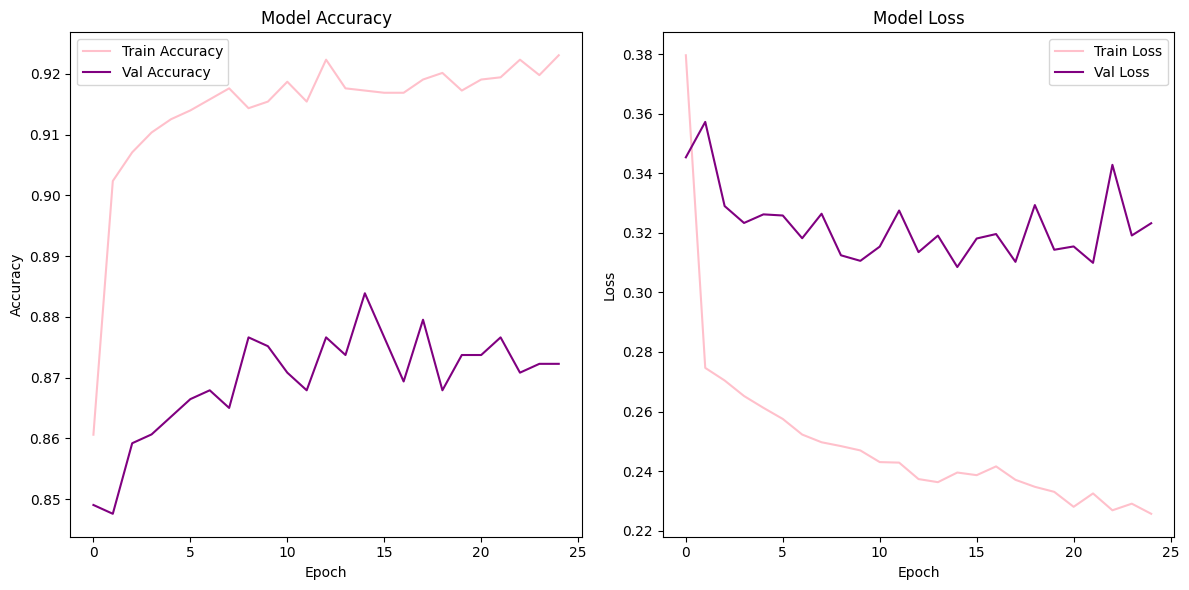

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


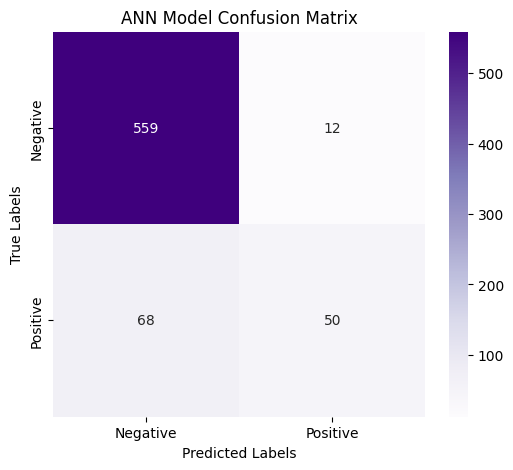

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Modelin doğruluğunu ve kaybını test verisi üzerinde değerlendiriyoruz
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# Eğitim ve doğrulama doğruluğu ve kaybını görselleştiriyoruz
plt.figure(figsize=(12, 6))

# Accuracy grafiği
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='pink')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='purple')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='pink')
plt.plot(history.history['val_loss'], label='Val Loss', color='purple')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Görselleştirmeyi gösteriyoruz
plt.tight_layout()
plt.show()

# ANN modelinin tahminlerini alıyoruz
y_pred_ann = model.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5)  # 0.5 eşik değerine göre sınıflandırıyoruz (ikili sınıflandırma)

# Confusion Matrix hesaplıyoruz
cm_ann = confusion_matrix(y_test, y_pred_ann)

# Confusion Matrix'i görselleştiriyoruz
plt.figure(figsize=(6, 5))
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Purples', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('ANN Model Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


CNN DEEP LEARNİNG

In [ ]:
# Veriyi 2D formatta reshape ediyoruz
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# CNN modelini oluşturuyoruz
cnn_model = Sequential()

# 1D Konvolüsyonel katman
cnn_model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))

# Diğer konvolüsyonel katman
cnn_model.add(Conv1D(32, 3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))

# Flatten katmanı
cnn_model.add(Flatten())

# Dense katman
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.2))

# Çıktı katmanı
cnn_model.add(Dense(1, activation='sigmoid'))  # İkili sınıflandırma

# Modeli derliyoruz
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Erken durdurma ile aşırı öğrenmeyi engelliyoruz
early_stopping_cnn = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# CNN modelini eğitiyoruz
history_cnn = cnn_model.fit(X_train_cnn, y_train, epochs=100, batch_size=32, validation_data=(X_test_cnn, y_test), callbacks=[early_stopping_cnn])


Epoch 1/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.8248 - loss: 0.4866 - val_accuracy: 0.8287 - val_loss: 0.4895
Epoch 2/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8964 - loss: 0.3249 - val_accuracy: 0.8331 - val_loss: 0.4327
Epoch 3/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8839 - loss: 0.3301 - val_accuracy: 0.8374 - val_loss: 0.3920
Epoch 4/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8966 - loss: 0.2918 - val_accuracy: 0.8491 - val_loss: 0.3704
Epoch 5/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8942 - loss: 0.2812 - val_accuracy: 0.8636 - val_loss: 0.3398
Epoch 6/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9015 - loss: 0.2876 - val_accuracy: 0.8462 - val_loss: 0.3771
Epoch 7/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9069 - loss: 0.2565 - val_accuracy: 0.8578 - val_loss: 0.3433
Epoch 8/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9088 - loss: 0.2567 - val_accuracy: 0.8491 -



---


CNN modeli için Loss ve Accuracy ve Confusion matrix grafikleri

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8772 - loss: 0.3064
CNN Test Accuracy: 86.79%


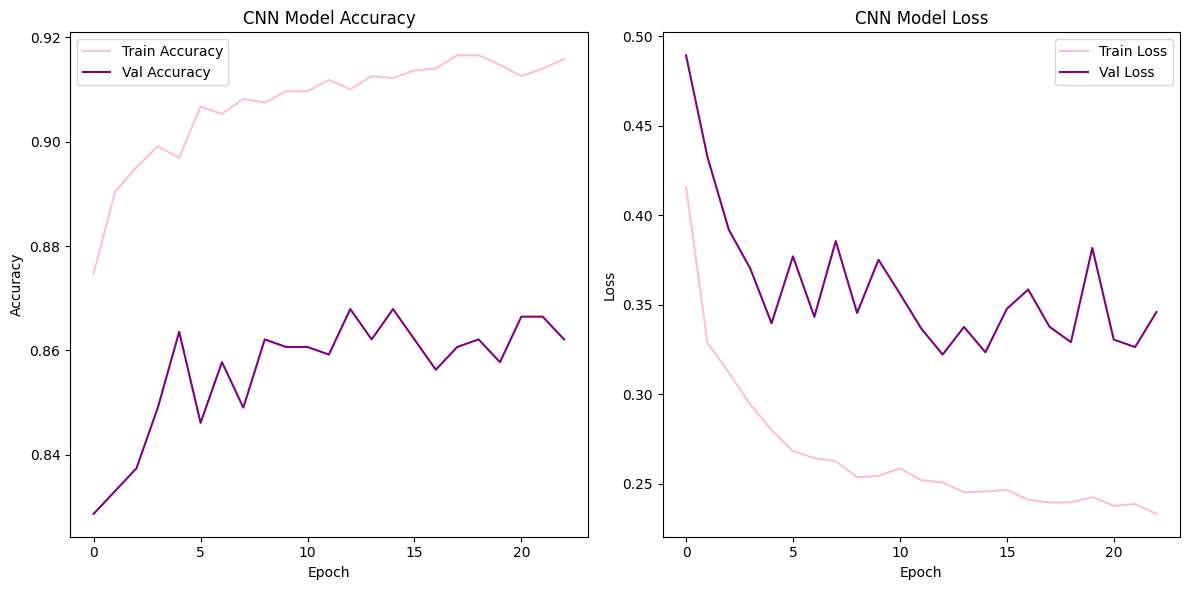

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


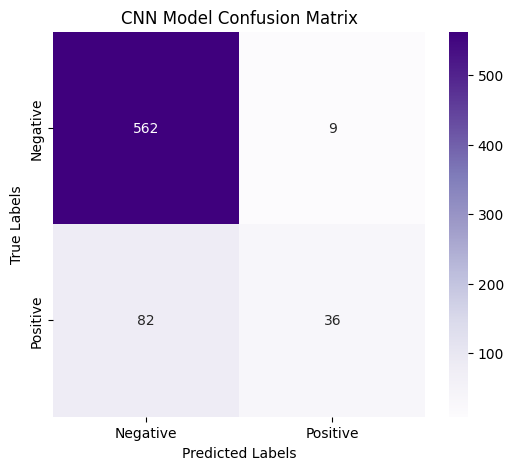

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# CNN modelinin doğruluğunu ve kaybını test verisi üzerinde değerlendiriyoruz
loss_cnn, accuracy_cnn = cnn_model.evaluate(X_test_cnn, y_test)
print(f'CNN Test Accuracy: {accuracy_cnn*100:.2f}%')

# Eğitim ve doğrulama doğruluğu ve kaybını görselleştiriyoruz
plt.figure(figsize=(12, 6))

# Accuracy grafiği
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy', color='pink')
plt.plot(history_cnn.history['val_accuracy'], label='Val Accuracy', color='purple')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss grafiği
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Train Loss', color='pink')
plt.plot(history_cnn.history['val_loss'], label='Val Loss', color='purple')
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Görselleştirmeyi gösteriyoruz
plt.tight_layout()
plt.show()

# CNN modelinin tahminlerini alıyoruz
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_cnn = (y_pred_cnn > 0.5)  # 0.5 eşik değerine göre sınıflandırıyoruz (ikili sınıflandırma)

# Confusion Matrix hesaplıyoruz
cm_cnn = confusion_matrix(y_test, y_pred_cnn)

# Confusion Matrix'i görselleştiriyoruz
plt.figure(figsize=(6, 5))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Purples', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('CNN Model Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


ANN ve CNN derin öğrenme modellerinin metriklerini aşağıda hesapladık

In [ ]:
# Ann modeli metrikleri
accuracy_ann = accuracy_score(y_test, y_pred_ann)
f1_ann = f1_score(y_test, y_pred_ann)
precision_ann = precision_score(y_test, y_pred_ann)
recall_ann = recall_score(y_test, y_pred_ann)
kappa_ann = cohen_kappa_score(y_test, y_pred_ann)

# CNN modeli metrikleri
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
f1_cnn = f1_score(y_test, y_pred_cnn)
precision_cnn = precision_score(y_test, y_pred_cnn)
recall_cnn = recall_score(y_test, y_pred_cnn)
kappa_cnn = cohen_kappa_score(y_test, y_pred_cnn)


Tüm modelleri (makine öğrenmesi ve derin öğrenme) değerlendirme metriklerine göre karşılaştırın.Aşağıdaki kodda tüm metrikleri karşılaştırıp grafiğini çizdirdim.


                 Model  Accuracy  F1 Score  Precision    Recall     Kappa
0  Logistic Regression  0.866473  0.410256   0.842105  0.271186  0.356572
1          Extra Trees  0.878084  0.475000   0.904762  0.322034  0.423132
2        Random Forest  0.898403  0.602273   0.913793  0.449153  0.551666
3                  SVM  0.851959  0.291667   0.807692  0.177966  0.244972
4    Gradient Boosting  0.888244  0.560000   0.859649  0.415254  0.504747
5                  ANN  0.883890  0.555556   0.806452  0.423729  0.496106
6                  CNN  0.867925  0.441718   0.800000  0.305085  0.383412


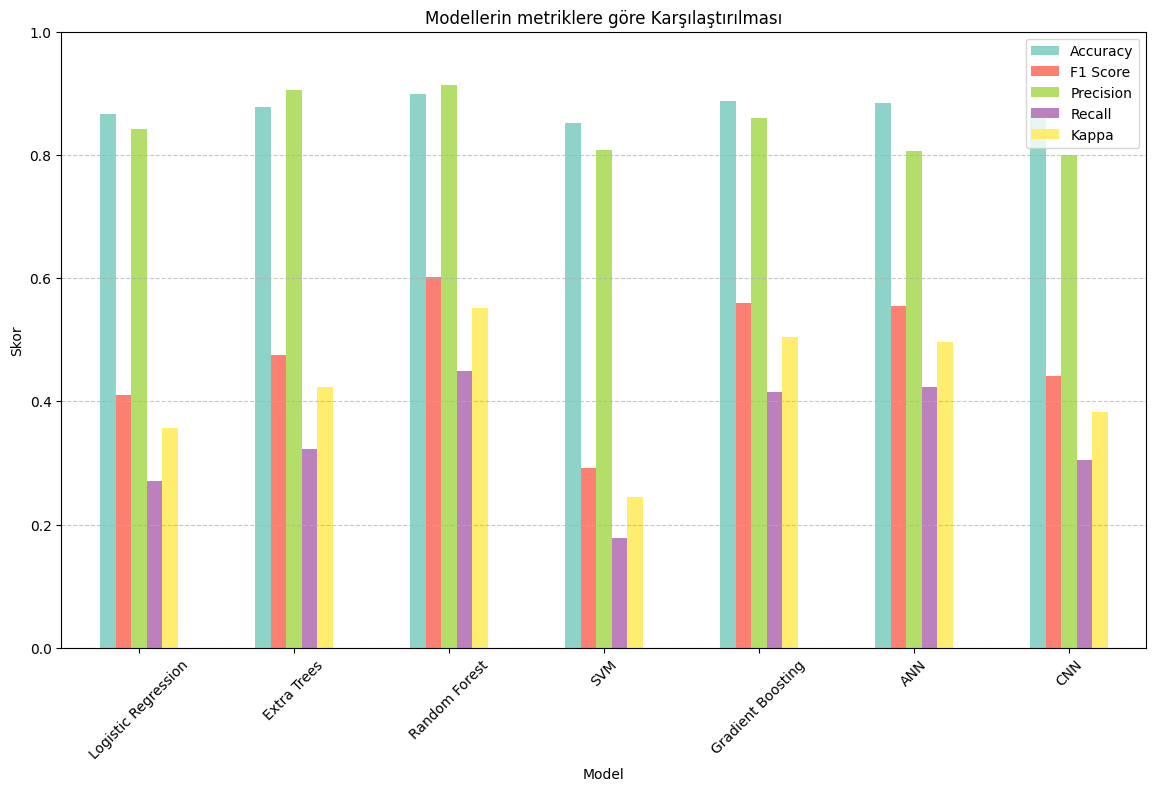

In [ ]:
# Tüm modellerin metriklerini bir araya getirip grafiğini çizdiriyoruz manuel ekledim öbür türlü yapamadımm
all_metrics = {
    'Model': ['Logistic Regression', 'Extra Trees', 'Random Forest', 'SVM', 'Gradient Boosting', 'ANN', 'CNN'],
    'Accuracy': [dogruluk['Logistic Regression']['accuracy'], dogruluk['Extra Trees']['accuracy'],
                 dogruluk['Random Forest']['accuracy'], dogruluk['SVM']['accuracy'],
                 dogruluk['Gradient Boosting']['accuracy'], accuracy_ann, accuracy_cnn],
    'F1 Score': [dogruluk['Logistic Regression']['f1'], dogruluk['Extra Trees']['f1'],
                 dogruluk['Random Forest']['f1'], dogruluk['SVM']['f1'],
                 dogruluk['Gradient Boosting']['f1'], f1_ann, f1_cnn],
    'Precision': [dogruluk['Logistic Regression']['precision'], dogruluk['Extra Trees']['precision'],
                  dogruluk['Random Forest']['precision'], dogruluk['SVM']['precision'],
                  dogruluk['Gradient Boosting']['precision'], precision_ann, precision_cnn],
    'Recall': [dogruluk['Logistic Regression']['recall'], dogruluk['Extra Trees']['recall'],
               dogruluk['Random Forest']['recall'], dogruluk['SVM']['recall'],
               dogruluk['Gradient Boosting']['recall'], recall_ann, recall_cnn],
    'Kappa': [dogruluk['Logistic Regression']['kappa'], dogruluk['Extra Trees']['kappa'],
              dogruluk['Random Forest']['kappa'], dogruluk['SVM']['kappa'],
              dogruluk['Gradient Boosting']['kappa'], kappa_ann, kappa_cnn]
}

metrics_df = pd.DataFrame(all_metrics)

# Tablonun gösterimi
print(metrics_df)

# Performans Grafiği
metrics_df.set_index('Model').plot(kind='bar', figsize=(14, 8), rot=45, colormap='Set3')
plt.title("Modellerin metriklere göre Karşılaştırılması")
plt.ylabel("Skor")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

En iyi performans gösteren modeli seçin.
Aşağıda bu işlemi yapıyoruz.

In [ ]:
# Performans sonuçlarını birleştiriyoruz
performance_results = {
    "Logistic Regression": dogruluk["Logistic Regression"],
    "Extra Trees": dogruluk["Extra Trees"],
    "Random Forest": dogruluk["Random Forest"],
    "SVM": dogruluk["SVM"],
    "Gradient Boosting": dogruluk["Gradient Boosting"],
    "ANN": {
        'accuracy': accuracy_ann,
        'f1': f1_ann
    },
    "CNN": {
        'accuracy': accuracy_cnn,
        'f1': f1_cnn
    }
}

# En iyi modeli seçiyoruz
best_model_name = max(performance_results, key=lambda x: (performance_results[x]['accuracy'], performance_results[x]['f1']))
print(f"En iyi model: {best_model_name}")

En iyi model: Random Forest


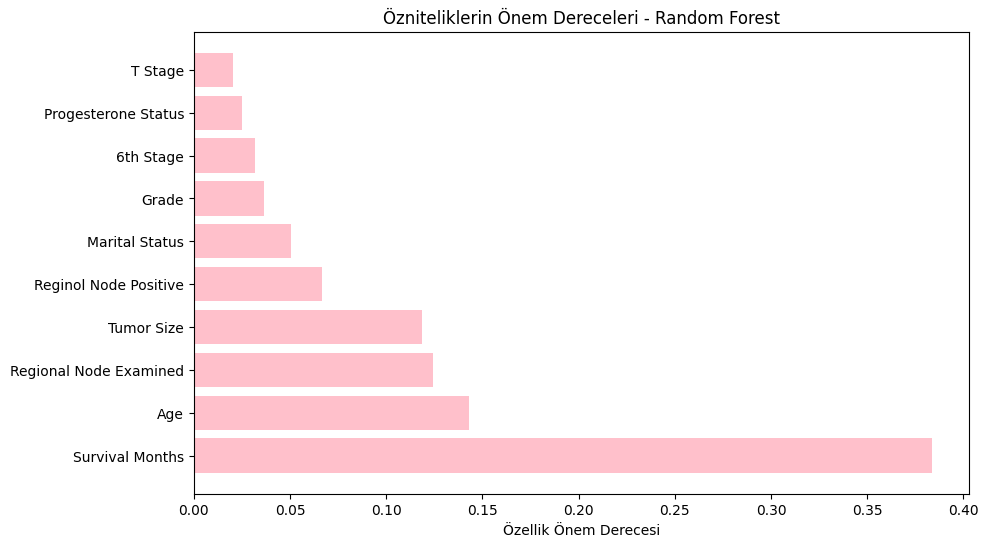

In [ ]:
import matplotlib.pyplot as plt

# Random Forest modelini seçiyoruz
model_rf = models["Random Forest"]

# Özniteliklerin önem sırasını alıyoruz
feature_importances = model_rf.feature_importances_

# Özniteliklerin isimlerini ve önemlerini eşleştiriyoruz
feature_importance_dict = {feature: importance for feature, importance in zip(secilen_ozellikler, feature_importances)}

# Öznitelikleri önem sırasına göre sıralıyoruz
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Özniteliklerin önem sırasına göre ilk 10 özelliği görselleştiriyoruz
top_features = sorted_feature_importances[:10]
top_features_names, top_features_importance = zip(*top_features)

# Grafiği oluşturuyoruz
plt.figure(figsize=(10, 6))
plt.barh(top_features_names, top_features_importance, color='pink')
plt.xlabel("Özellik Önem Derecesi")
plt.title("Özniteliklerin Önem Dereceleri - Random Forest")
plt.show()




*   Aşağıda Random Forest modeline göre Özniteliklerin önem derecesini belirliyoruz küçükten büyüğe



- Öznitelik seçimi yapın ve buna göre model başarısında bir artış oldumu belirleyin.

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Özniteliklerin önemini sıralıyoruz
feature_importances = sorted(zip(X.columns, rf.feature_importances_), key=lambda x: x[1], reverse=True)

# İlk 10 önemli özelliği seçiyoruz
top_important_features = [feature for feature, importance in feature_importances[:10]]

# Önemli özelliklerle yeni veri setini oluşturuyoruz
X_selected_reduced = X[top_important_features]

# Eğitim ve test verilerini ayırıyoruz
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_selected_reduced, y, test_size=0.2, random_state=42)

# Yeni Random Forest modelini eğitiyoruz
rf_reduced = RandomForestClassifier(random_state=42)
rf_reduced.fit(X_train_reduced, y_train)

# Tahminleri yapıyoruz
y_pred_reduced = rf_reduced.predict(X_test_reduced)

# Performans metriklerini hesaplıyoruz
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
f1_reduced = f1_score(y_test, y_pred_reduced)

# Sonuçları yazdırıyoruz
print("\nRandom Forest öznitelik önemine göre seçilen özelliklerle performans:")
print(f"Accuracy: {accuracy_reduced:f}, F1 Score: {f1_reduced:f}")


Random Forest öznitelik önemine göre seçilen özelliklerle performans:
Accuracy: 0.895501, F1 Score: 0.595506


In [ ]:
# RFE ile bulduğumuz doğruluk
accuracy_rf = dogruluk['Random Forest']['accuracy']
print(f"Random Forest Modelinin RFE ile bulduğumuz Doğruluk: {accuracy_rf:f}")
print(f"Random Forest öznitelik önemine göre seçilen özelliklerle Doğruluk: {accuracy_reduced:f}")

# Sonuçları karşılaştırıyoruz
if accuracy_rf > accuracy_reduced:
    print("\nRFE ile bulduğumuz sonuç daha iyi çıktı")
elif accuracy_rf == accuracy_reduced:
    print("\nİki değerinde doğruluğu eşittir.")
else:
    print("\nSeçilen özelliklerle bulduğumuz sonuç daha iyi çıktı")

Random Forest Modelinin RFE ile bulduğumuz Doğruluk: 0.898403
Random Forest öznitelik önemine göre seçilen özelliklerle Doğruluk: 0.895501

RFE ile bulduğumuz sonuç daha iyi çıktı




---


Modeli Dağıtıma Hazırlama
- En iyi modeli tüm modellerin accuracy ve F1-skor değerlerine bakarak seçin ve kaydedin (en iyi accuracy ve f1-skor manuel olarak seçilmemelidir). - Modeli yükleyip yeni örnekler için tahmin yapacak bir fonksiyon geliştirin. Veri setinizde olan örneklere benzer örnekler gönderin ve modelin sonuç üretmesini sağlayın.



---


Aşağıda Modeller arasında accuracy ve F1-skor değerlerine bakarak modelleri karşılaştırıp en iyi modeli seçip kaydediyoruz.

In [ ]:
import pandas as pd
import joblib

# Modellerin metriklerini içeren DataFrame
dogruluk_df = pd.DataFrame(dogruluk).T  # dogruluk dictionary'sini DataFrame'e çevirir

# En iyi modelin accuracy ve F1 skoru ile karşılaştırma yapıyoruz
best_model_name = dogruluk_df.sort_values(by=['accuracy', 'f1'], ascending=False).index[0]

# En iyi modelin seçilmesi
best_model = models[best_model_name]

# Modelin kaydedilmesi
joblib.dump(best_model, 'best_model.pkl')  # Modeli 'best_model.pkl' olarak kaydet
print("En iyi model kaydedildi: best_model.pkl")


En iyi model kaydedildi: best_model.pkl




---
Modeli yükleyip yeni örnekler için tahmin yapacak bir fonksiyon geliştirin. Veri setinizde olan örneklere benzer örnekler gönderin ve modelin sonuç üretmesini sağlayın.




---

Aşağıda modelimizi best_model.pkl yi yüklüyoruz

In [ ]:
import joblib

# Kaydedilen modelin yüklenmesi
loaded_model = joblib.load('/content/best_model.pkl')
print("Model başarıyla yüklendi!")

Model başarıyla yüklendi!




*  Yeni örnekler için tahmin yapacak bir fonksiyon geliştirin


* Aşağıda tahmin yapacak make_prediction fonksiyonunu oluşturuyoruz






In [ ]:
import pandas as pd
import joblib

def make_prediction(input_data, model_path='/content/best_model.pkl'):

    input_data_reduced = input_data[secilen_ozellikler]  # secilen_ozellikler daha önce belirlediğimiz önemli özellikler

    # Model ile tahmin yapıyoruz
    prediction = loaded_model.predict(input_data_reduced)

    return prediction




---

 Modelin kullandığı özellik sırasını alıyoruz model tahmini yapmam için bu sıra önemli çünkü ilk bir kaç kez hata aldım

In [ ]:

feature_order = model_rf.feature_names_in_
print("Modelin eğitimde kullandığı özellikler:")
print(feature_order)


Modelin eğitimde kullandığı özellikler:
['Age' 'Marital Status' 'T Stage' '6th Stage' 'Grade' 'Tumor Size'
 'Progesterone Status' 'Regional Node Examined' 'Reginol Node Positive'
 'Survival Months']


In [ ]:
# Yeni örnek veri modelin eğitimde kullandığı özelliklere göre bu data örneğini yazdım
new_data = pd.DataFrame({
    'Age': [60],
    'Marital Status': [0],
    'T Stage': [2],
    '6th Stage': [2],
    'Grade': [2],
    'Tumor Size': [23],
    'Progesterone Status': [1],
    'Regional Node Examined': [15],
    'Reginol Node Positive': [9],
    'Survival Months': [100],
})
# Modelin eğitimde kullandığı özellik sırasını alıyoruz
feature_order = model_rf.feature_names_in_

# Yeni veriyi modelin eğitim sırasına uygun şekilde sıralıyoruz

new_data_reduced = new_data[feature_order]
# Tahmin yapmak için fonksiyonu çağırıyoruz
prediction = model_rf.predict(new_data_reduced)

# Tahmin sonucunu yazdırıyoruz.

if prediction[0] == 1:
    print("Yeni örneğin tahmini: Öldü")
else:
    print("Yeni örneğin tahmini: Hayatta")

Yeni örneğin tahmini: Hayatta



Status:

*   Alive:0
*   Dead:1





Sonuç:
Projemde 7 farklı model kullandım:
1.   Logistic Regression
2.   Random Forest Classifier
3.   SVC
4.   Gradient Boosting Classifier
5.   Extra Trees Classifier
6.   ANN
7.   CNN


   Burada kulandığım modellerden en yüksek doğruluk RandomForestClassifier'dır.Modelim seçilen özniteliklere göre eğitilmiş olup buna uygun girilen değerlerde hastanın ölüm ve yaşam durum tahmini yapıyor.











**The end**